In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [0]:
#convert to datetime format
def parse(x):
    return datetime.strptime(x,'%Y %m %d %H')
df = pd.read_csv('drive/My Drive/Colab Notebooks/BA_Combined.csv',parse_dates = [['Year','Month','Day','Hour']],index_col=0,date_parser=parse)
df.drop('Minute',axis=1,inplace=True)
df.drop('DNI',axis=1,inplace=True)
df.drop('DHI',axis=1,inplace=True)
df.drop('Wind Speed',axis=1,inplace=True)    
# df = df[df.GHI != 0]
df.columns = ['GHI','Dew Point','Temperature','Pressure','Relative Humidity','Wind Direction']
df.index.name = 'date'
print(df.head())


                     GHI  Dew Point  ...  Relative Humidity  Wind Direction
date                                 ...                                   
2010-01-01 08:00:00  135         -2  ...          27.988229       70.387955
2010-01-01 09:00:00  331          0  ...          25.638371       72.587616
2010-01-01 10:00:00  514          0  ...          21.699108       78.977242
2010-01-01 11:00:00  617          1  ...          18.483890       98.597931
2010-01-01 12:00:00  663          2  ...          17.682752      116.942879

[5 rows x 6 columns]


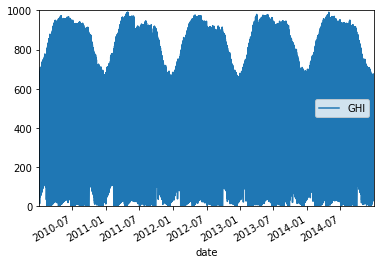

In [0]:
df[['GHI']].plot()
plt.ylim((0,1000))
plt.show()

In [0]:
#autocorrelation plot

In [0]:
#scaling output
from sklearn import preprocessing
#c = df[['GHI']]
#a = np.asarray(c)
from sklearn.preprocessing import StandardScaler
scaleX=StandardScaler()
scaley=StandardScaler()

#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(a)
#print(scaled_data)
#print(c)
data2 = scaleX.fit_transform(df[['GHI']])
data2.shape

(21622, 1)

In [0]:
#scaling input
data1 = scaley.fit_transform(df[['Dew Point','Temperature','Pressure','Relative Humidity','Wind Direction']])
data1.shape

(21622, 5)

In [0]:
#selecting input
train_input = data1[0:1000]
x_train = train_input[:-1,:]
x_train.shape

(999, 5)

In [0]:
#selecting output
train_output = data2[0:1000]
y_train = train_output[1:]
y_train.shape

(999, 1)

In [0]:
def rmse(model_predict, y_train):
    return np.sqrt(((model_predict - y_train)**2).mean())


In [0]:
def mean_absolute_percentage_error(y_train,model_predict):
    y_train,model_predict = np.array(y_train),np.array(model_predict)
    return np.mean(np.abs((y_train-model_predict)/y_train)*100)

In [0]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
order=(2,1,2)
sorder=(0,1,0,10)

In [0]:
model1 = SARIMAX(endog = data2[12:2012],exog = data1[:2000],order = order,seasonal_order=sorder)
model_fit1 = model1.fit(disp=0)
print(model_fit1.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                 2000
Model:             SARIMAX(2, 1, 2)x(0, 1, 0, 10)   Log Likelihood                -443.373
Date:                            Wed, 04 Sep 2019   AIC                            906.747
Time:                                    17:04:54   BIC                            962.701
Sample:                                         0   HQIC                           927.298
                                           - 2000                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1609      0.040     -4.047      0.000      -0.239      -0.083
x2             0.2448      0.029   

In [0]:
model_predict1 = model_fit1.predict(start =1013,end =1500 ,exog=data1[:1001],dynamic = False)
inverses = scaleX.inverse_transform(model_predict1)
inverses  
actual=scaleX.inverse_transform()

array([ 8.47267213e+02,  7.19578928e+02,  5.74208586e+02,  4.00125538e+02,
        4.22448756e+02,  1.43276051e+02, -3.27500386e+01,  2.54373426e+02,
        5.46483267e+02,  7.61234750e+02,  8.81917417e+02,  9.48460696e+02,
        9.10715182e+02,  7.46765320e+02,  5.86966950e+02,  4.23017645e+02,
        4.48870984e+02,  1.71455043e+02, -1.58018787e-01,  2.46434215e+02,
        5.37390400e+02,  7.67863240e+02,  8.32972190e+02,  9.56242193e+02,
        8.93511782e+02,  8.03287194e+02,  5.75958729e+02,  4.23238048e+02,
        4.07045911e+02,  1.70107590e+02,  9.47275207e+00,  2.38832489e+02,
        5.56723276e+02,  7.33954921e+02,  8.93626737e+02,  9.28381226e+02,
        8.92205182e+02,  7.69472073e+02,  5.84946535e+02,  4.04395147e+02,
        4.09836241e+02,  1.76956504e+02,  8.01808106e+00,  2.51720758e+02,
        5.46112226e+02,  7.29924253e+02,  8.75796640e+02,  8.80069031e+02,
        9.06903403e+02,  7.85217703e+02,  5.97494468e+02,  4.11192881e+02,
        4.00391496e+02,  

In [0]:
prediction=list()
actual1=list()
for i in range(600):
  model_predict1 = model_fit1.predict(start =1012+i,end =1012+i ,exog=data1[i:1000+i],dynamic = False)
  inverses = scaleX.inverse_transform(model_predict1)
  actual=scaleX.inverse_transform(data2[1012+i])
  prediction.append(inverses)
  actual1.append(actual)
  

[array([867.56604382]), array([847.26721257]), array([719.57892835]), array([574.20858631]), array([400.12553845]), array([422.44875626]), array([143.27605131]), array([-32.75003861]), array([254.37342616]), array([546.48326736]), array([761.23474958]), array([881.91741677]), array([948.46069591]), array([910.71518199]), array([746.76532008]), array([586.96694976]), array([423.01764461]), array([448.87098415]), array([171.45504282]), array([-0.15801879]), array([246.43421478]), array([537.39039962]), array([767.86323991]), array([832.97219008]), array([956.24219259]), array([893.51178166]), array([803.28719396]), array([575.95872888]), array([423.23804784]), array([407.04591072]), array([170.10759025]), array([9.47275207]), array([238.83248931]), array([556.72327578]), array([733.95492055]), array([893.62673692]), array([928.38122601]), array([892.20518248]), array([769.47207288]), array([584.94653487]), array([404.39514695]), array([409.83624057]), array([176.95650381]), array([8.0180

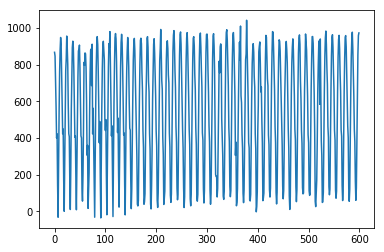

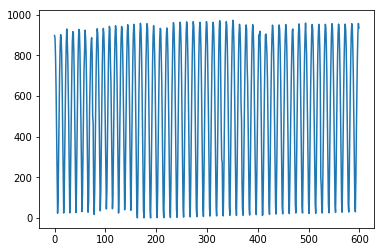

In [0]:
print(prediction)
print(actual1)
plt.plot(prediction)
plt.show()
plt.plot(actual1)
plt.show()

In [0]:
rmse(np.asarray(prediction),np.asarray(actual1))

153.8814391192224

In [0]:
np.mean(np.abs((np.asarray(actual1)-np.asarray(prediction))/np.asarray(actual1)))*100

134.852843854729

In [0]:
inverses = scaleX.inverse_transform(model_predict1)
inverses

array([973.40755124])

In [0]:
actual=scaleX.inverse_transform(data2[1015])
actual

array([640.])

In [0]:
rmse(np.asarray(prediction),np.asarray(actual1))

153.8814391192224